In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import anndata as ad
import scipy as sp

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80)

In [3]:
# select the scanorama integration data.

save_file = '../data/GSE149689/results/scanpy_dr_covid.h5ad'
adata = sc.read_h5ad(save_file)
adata

AnnData object with n_obs × n_vars = 5131 × 3248
    obs: 'type', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'percent_chrY', 'XIST-counts', 'n_counts', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'doublet_info_colors', 'hvg', 'neighbors', 'pca', 'sample_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

### GRAPH CLUSTERING

The procedure of clustering on a Graph can be generalized as 3 main steps:

1. Build a kNN graph from the data
2. Prune spurious connections from kNN graph (optional step). This is a SNN graph.
3. Find groups of cells that maximizes the connections within the group compared other groups.

The modularity optimization algoritm in Scanpy are Leiden and Louvain. Lets test both and see how they compare.
#### Leiden

In [4]:
sc.tl.leiden(adata, key_added = "leiden_1.0") # default resolution in 1.0
sc.tl.leiden(adata, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(adata, resolution = 0.4, key_added = "leiden_0.4")
sc.tl.leiden(adata, resolution = 1.4, key_added = "leiden_1.4")

running Leiden clustering
    finished: found 17 clusters and added
    'leiden_1.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden_1.4', the cluster labels (adata.obs, categorical) (0:00:00)


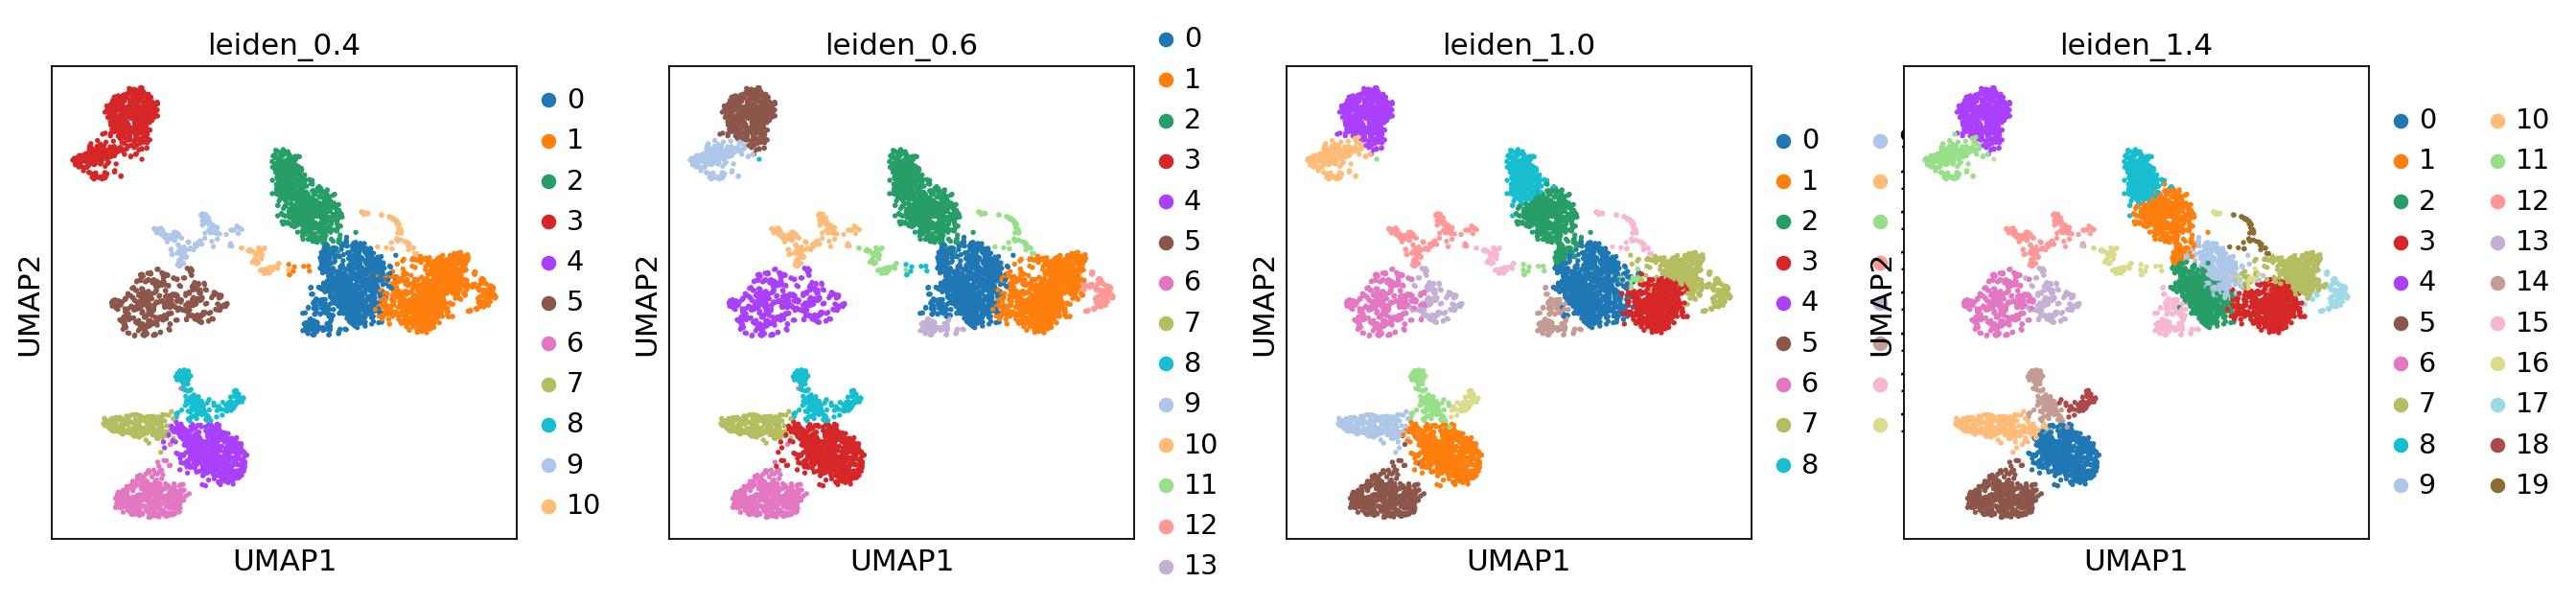

In [5]:
sc.pl.umap(adata, color=['leiden_0.4', 'leiden_0.6', 'leiden_1.0','leiden_1.4'])

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_0.6']`


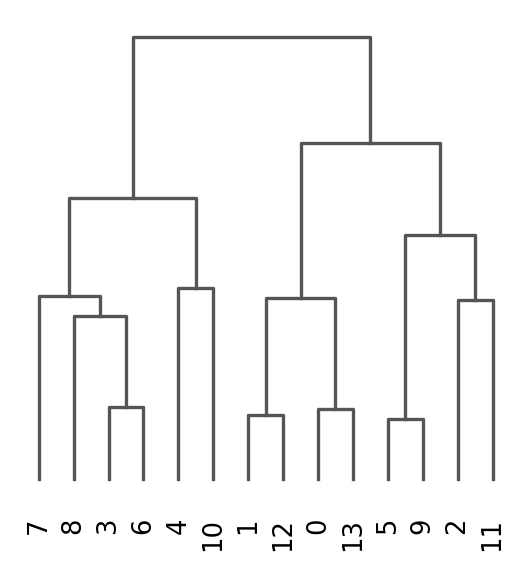

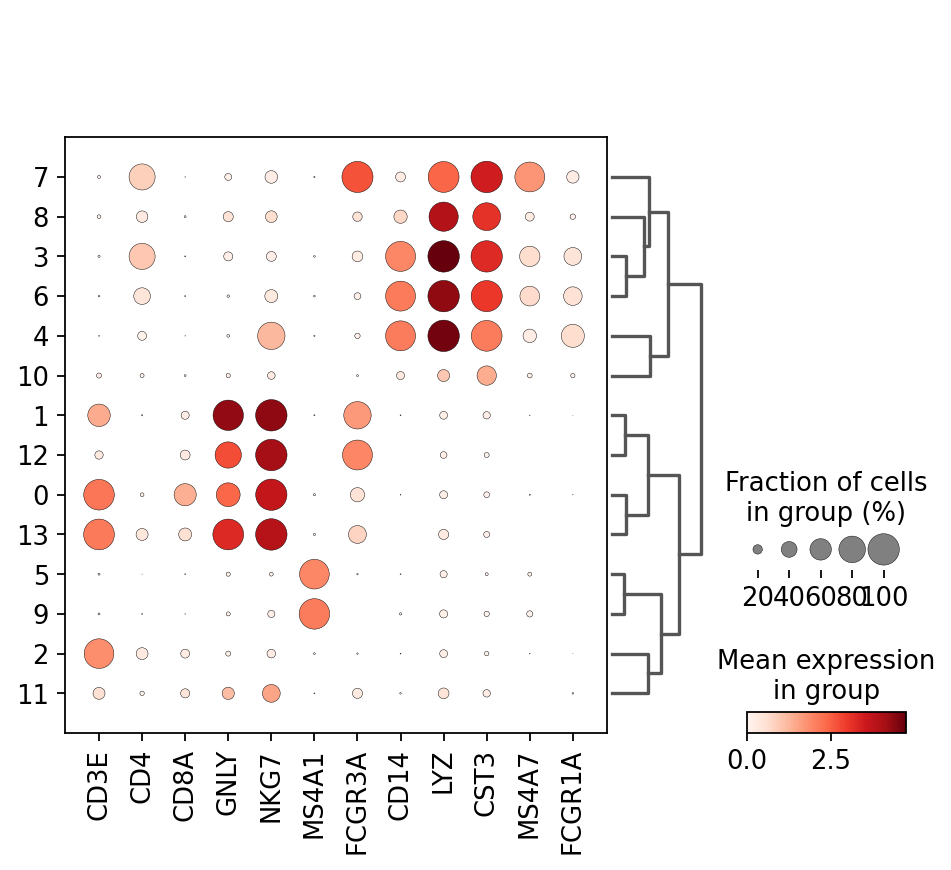

In [6]:
sc.tl.dendrogram(adata, groupby = "leiden_0.6")
sc.pl.dendrogram(adata, groupby = "leiden_0.6")

genes  = ["CD3E", "CD4", "CD8A", "GNLY","NKG7", "MS4A1","FCGR3A","CD14","LYZ","CST3","MS4A7","FCGR1A"]
sc.pl.dotplot(adata, genes, groupby='leiden_0.6', dendrogram=True)

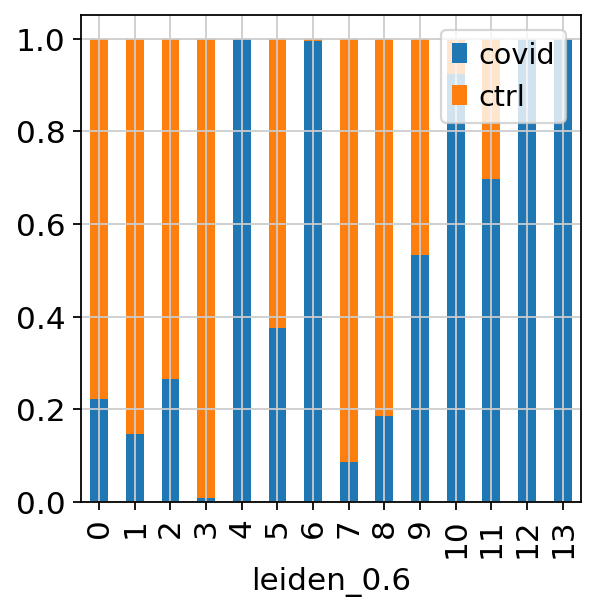

In [7]:
tmp = pd.crosstab(adata.obs['leiden_0.6'],adata.obs['type'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='upper right')

### LOUVAIN

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain_1.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 12 clusters and added
    'louvain_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 9 clusters and added
    'louvain_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 16 clusters and added
    'louvain_1.4', the cluster labels (adata.obs, categorical) (0:00:00)


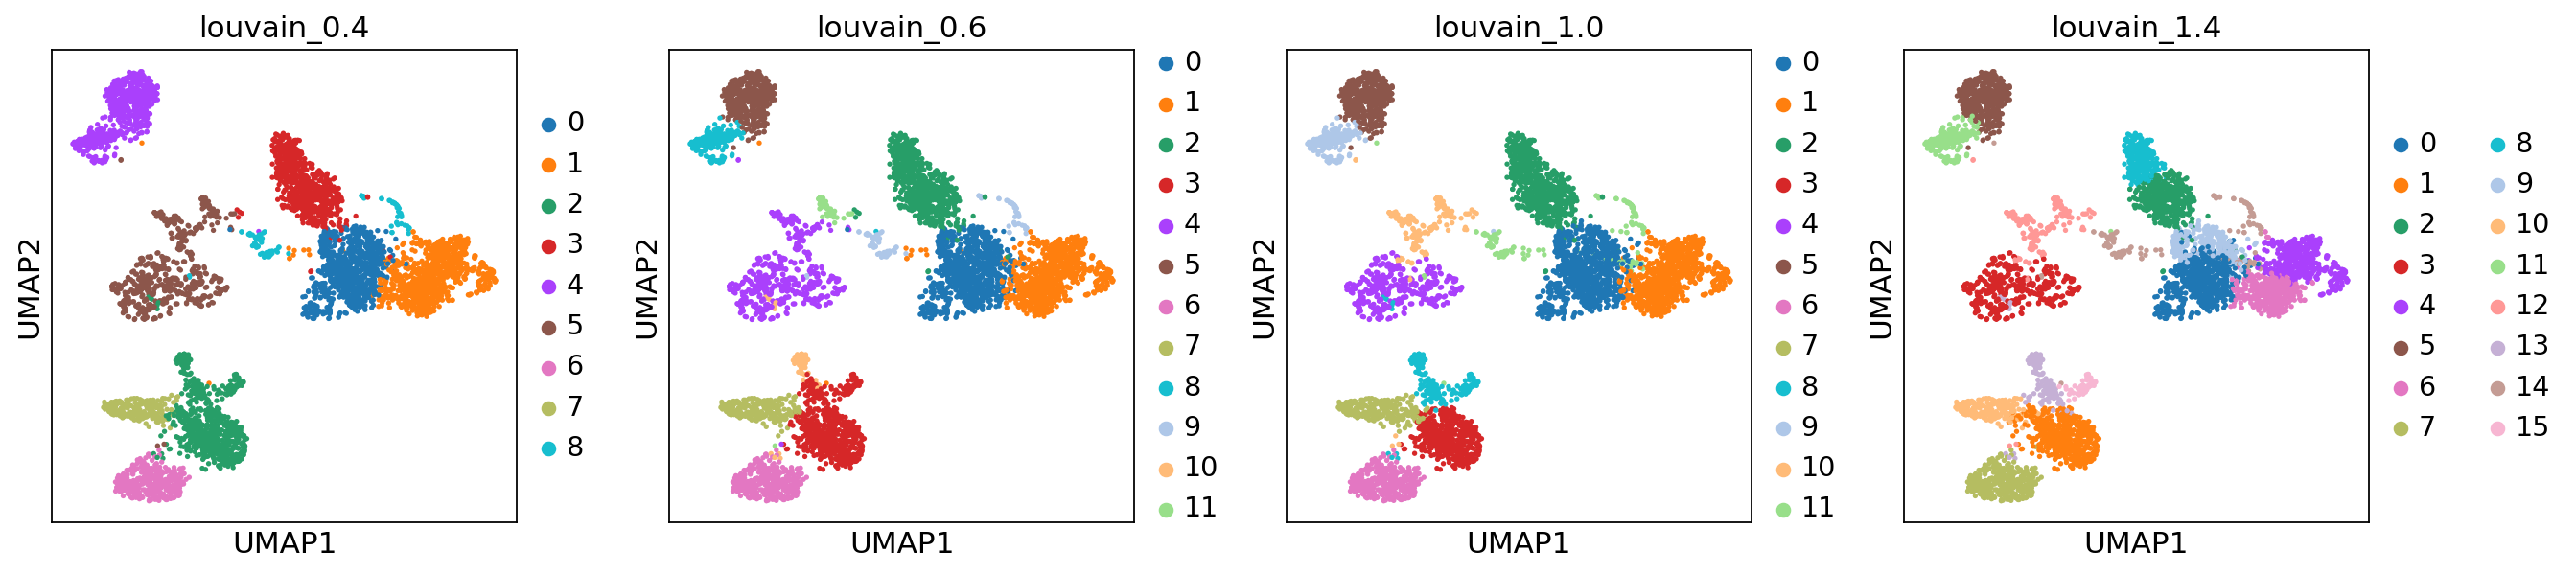

In [8]:
sc.tl.louvain(adata, key_added = "louvain_1.0") # default resolution in 1.0
sc.tl.louvain(adata, resolution = 0.6, key_added = "louvain_0.6")
sc.tl.louvain(adata, resolution = 0.4, key_added = "louvain_0.4")
sc.tl.louvain(adata, resolution = 1.4, key_added = "louvain_1.4")

sc.pl.umap(adata, color=['louvain_0.4', 'louvain_0.6', 'louvain_1.0','louvain_1.4'])

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain_0.6']`


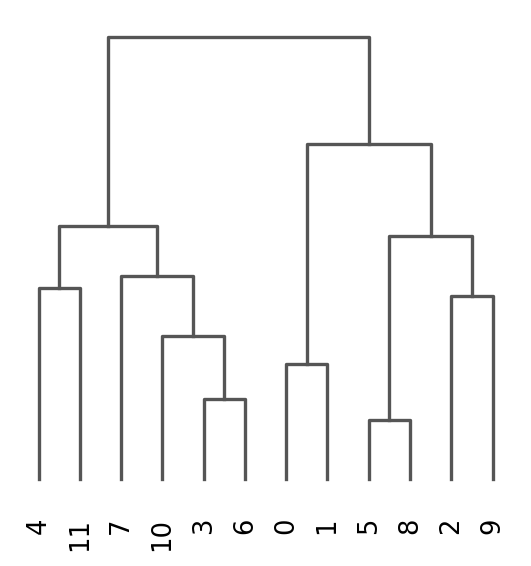

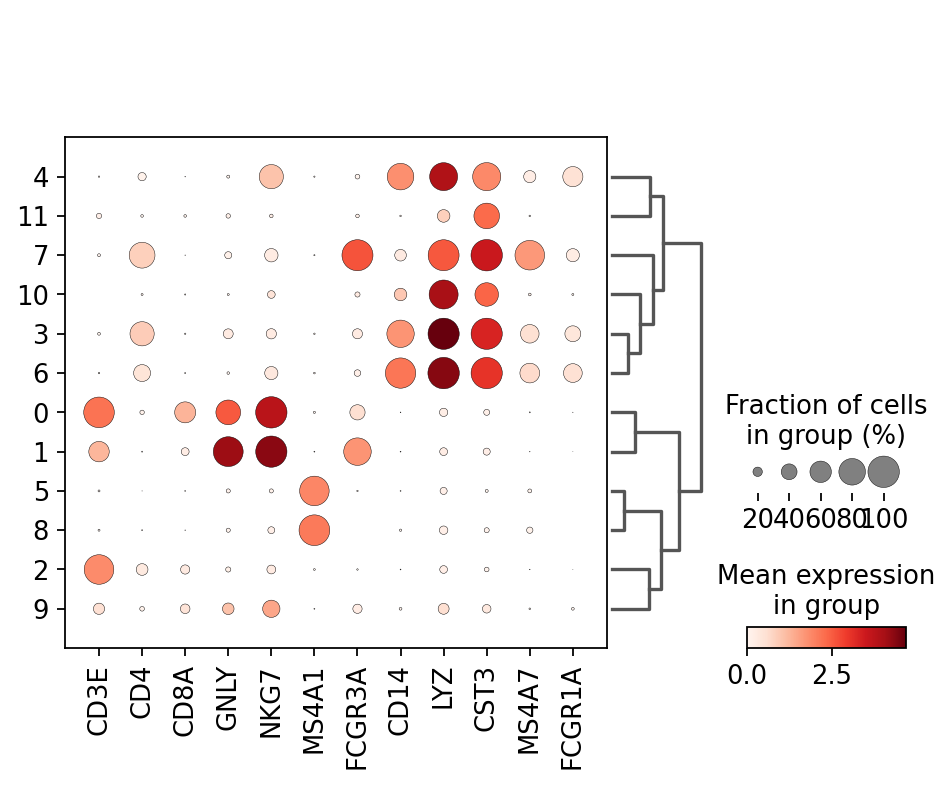

In [9]:
sc.tl.dendrogram(adata, groupby = "louvain_0.6")
sc.pl.dendrogram(adata, groupby = "louvain_0.6")

genes  = ["CD3E", "CD4", "CD8A", "GNLY","NKG7", "MS4A1","FCGR3A","CD14","LYZ","CST3","MS4A7","FCGR1A"]
sc.pl.dotplot(adata, genes, groupby='louvain_0.6', dendrogram=True)